# Profanity in Quora questions
This notebook investigates the use and distribution of profanity (offensive language) among the Quora dataset of questions. Perhaps detection of profaniity in a question could help determine whether the question is insincere. We will use the full list of words blacklisted by Google, found [here](https://www.freewebheaders.com/full-list-of-bad-words-banned-by-google/).


## Import packages and data

In [34]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pickle
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [14]:
# Import training and test data from Quora questions dataset
train = pd.read_csv('/Volumes/SDMemory/Datasets/Quora/train.csv')
test = pd.read_csv('/Volumes/SDMemory/Datasets/Quora/test.csv')

# Import list of bad words (banned by Google)
bad_words = pd.read_csv('/Volumes/SDMemory/Datasets/Quora/bad_words.csv', header=None)

In [15]:
# Sample of bad words - some are actually not swear words as such
bad_words.sample(3)

,0
1543,tard
968,kike
1006,leather restraint


## Function to detect and output bad words in text

In [16]:
# Returns a list (possibly empty) of bad words in text
def detect_badwords(text):
    # tokenize the text
    tokens = word_tokenize(text)
    bad_found = []
    for word in tokens:
        for bad_word in bad_words[0]:
            if bad_word == word:
                bad_found.append(word)
    return bad_found

In [17]:
# Simple examples
s1 = 'This politician speaks nothing but bullshit, what a twat'
s2 = 'It is a nice day today'
[detect_badwords(s) for s in [s1,s2]]

[['bullshit', 'twat'], []]

In [44]:
# Simple use of tqdm
from time import sleep
for i in tqdm(range(100), desc = 'Running through i'):
    sleep(0.01)

HBox(children=(IntProgress(value=0, description='Running through i', style=ProgressStyle(description_width='initial')), HTML(value='')))

## Apply to the Quora dataset


In [19]:
# # Register `pandas.progress_apply' with `tqdm`
# tqdm.pandas()
# # Run detect_badwords over all entries in the training data
# temp_size = 10000
# train_bad_words = train['question_text'].progress_apply(detect_badwords)
# # Add as a column to the DataFrame
# train['bad_words'] = train_bad_words

# # Export the new dataframe as a pickle file for import at a later date
# train.to_pickle('/Volumes/SDMemory/Datasets/Quora/train_bw.pkl')

HBox(children=(IntProgress(value=0, max=1306122), HTML(value='')))

In [26]:
# Import training data with bad words detected
train = pd.read_pickle('/Volumes/SDMemory/Datasets/Quora/train_bw.pkl')

In [29]:
# Collect all bad words used in the sincere data
bools_bw_nonempty = [train['bad_words'].iloc[i] != [] for i in tqdm(range(train.shape[0]))]
df_bw = train[bools_bw_nonempty]

# Sincere set
df_bw_sincere = df_bw[df_bw['target'] == 0]
# Insincere set
df_bw_insincere = df_bw[df_bw['target'] ==1 ]


HBox(children=(IntProgress(value=0, max=1306122), HTML(value='')))

In [30]:
df_bw_sincere.head()

,qid,question_text,target,bad_words
20,0000dd973dfd35508c16,How I know whether a girl had done sex before ...,0,"[sex, sex]"
48,000209378782897bbd75,What is that movie in which a kid is fooled in...,0,[kill]
58,00029d76717deaff60f6,Someone breaks into your house you shoot and k...,0,[kill]
181,00083b5c34d0b450557f,Can I kill myself now?,0,[kill]
242,000b5eb278abb46ace82,What does it mean that my boyfriend of 3 years...,0,[erection]


In [31]:
# Define a function to flatten a list of lists
def flatten(l):
    x = []
    for sublist in l:
        for element in sublist:
            x.append(element)
    return x

# import collections library which has functions to compute frequency of elements
import collections

In [32]:
# Collect all bad words and their freqencies in the sincere questions
list_bw_sincere = df_bw_sincere['bad_words'].iloc[:temp_size].tolist()
counter_sincere = collections.Counter(flatten(list_bw_sincere))
# Find the 10 most frequent words
temp = counter_sincere.most_common(10)
# Put into a DataFrame
df = pd.DataFrame(temp, columns = ['Word', 'Frequency'])

In [36]:
df

,Word,Frequency
0,sex,1878
1,kill,696
2,sexual,486
3,gay,417
4,porn,405
5,crack,402
6,stupid,250
7,penis,237
8,god,229
9,weed,190


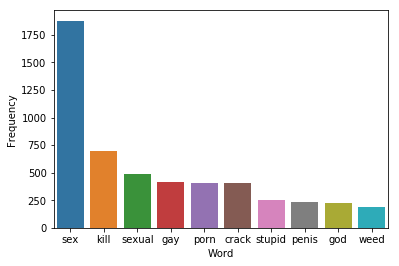

In [37]:
# Make a bar plot of 10 most frequent bad words
sns.barplot(x='Word',
            y='Frequency',
            data=df,
           )

In [42]:
# Collect all bad words and their freqencies in the sincere questions
list_bw_insincere = df_bw_insincere['bad_words'].iloc[:temp_size].tolist()
counter_insincere = collections.Counter(flatten(list_bw_insincere))
# Find the 10 most frequent words
temp = counter_insincere.most_common(10)
# Put into a DataFrame
df = pd.DataFrame(temp, columns = ['Word', 'Frequency'])

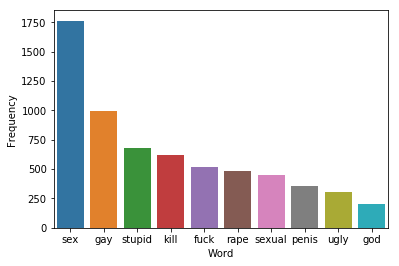

In [43]:
# Make a bar plot of 10 most frequent bad words
sns.barplot(x='Word',
            y='Frequency',
            data=df,
           )